<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/6_Cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np

In [101]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [102]:
path = "/content/drive/My Drive/Optimisation/"

df_1 = pd.read_csv(path+'labeled_showcase.csv')
df_2 = pd.read_csv(path+'clean_data_final01.csv')

In [103]:
df_1 = df_1[['Телефон_new','labels']]
df_1

,Телефон_new,labels
0,32555749-545749525150 .,1
1,55494851-56495152535476,1
2,55574848-48485149515175,0
3,55574848-48485149515377,0
4,55574848-48494948544878,1
...,...,...
58025,56575053-49545153535383,1
58026,56575454-48485156545486,3
58027,56575655-52525750505484,1
58028,57484948-48505057565793,1


In [5]:
df_2

,Unnamed: 0,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,Revenue,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,Marge,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина
0,1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,1,379.0,379.0,"209,8",3,2 017,Доставлен,Регионы,169.20,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0
1,2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,1,3325.0,3325.0,1 149,3,2 017,Доставлен,Регионы,2176.00,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0
2,4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,1,199.0,199.0,79,3,2 017,Доставлен,Регионы,120.00,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0
3,8,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,3,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0
4,9,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,2,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214450,691531,17.04.2017 3:18,28.04.2017 0:00,4410609_TR,Доставлен,2607,2 607,Магазины,Безналичная,Краснодар,ПОДГУЗНИКИ,ПОДГУЗНИКИ,подгузники,ППКП,"DORAEMON, ПОДГУЗНИКИ (9-14 кг)",МГТ,Нет,1,865.0,865.0,680,4,2 017,Доставлен,Регионы,185.00,0,0,1,1,17.04.2017 0:00,55575449-53485056485678,95117__u17@mail.ru,Наталья,IDL00043781351,0
214451,691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1 377,Магазины,Безналичная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"TOMY LAMAZE, КНИЖКА- шуршалка Пират Пит",МГТ,Нет,1,464.0,464.0,"324,8",4,2 017,Доставлен,Москва,139.20,49,49,2,1,17.04.2017 0:00,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0
214452,691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, НАСАДКА для зубной щетки SonicPulsa...",МГТ,Нет,1,249.0,249.0,207,4,2 017,Доставлен,Регионы,42.00,0,0,1,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0
214453,691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, ЩЕТКА зубная эл. SonicPulsar CS-562...",МГТ,Нет,1,849.0,849.0,705,4,2 017,Доставлен,Регионы,144.00,0,0,2,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0


In [104]:
df_2.drop('Unnamed: 0', axis=1, inplace=True)
df_2.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'Количество', 'Цена', 'Revenue', 'ЦенаЗакупки',
       'МесяцДатыЗаказа', 'ГодДатыЗаказа', 'Статус', 'Гео', 'Marge',
       'СуммаУслуг', 'СуммаДоставки', 'НомерСтроки',
       'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте', 'Телефон_new',
       'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU', 'ГородМагазина'],
      dtype='object')

In [105]:
df = df_2.merge(df_1, on=['Телефон_new'], how='left')


In [106]:
df

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,Revenue,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,Marge,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,labels
0,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,1,379.0,379.0,"209,8",3,2 017,Доставлен,Регионы,169.20,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,1
1,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,1,3325.0,3325.0,1 149,3,2 017,Доставлен,Регионы,2176.00,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,2
2,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,1,199.0,199.0,79,3,2 017,Доставлен,Регионы,120.00,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,1
3,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,3,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0,3
4,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,2,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214450,17.04.2017 3:18,28.04.2017 0:00,4410609_TR,Доставлен,2607,2 607,Магазины,Безналичная,Краснодар,ПОДГУЗНИКИ,ПОДГУЗНИКИ,подгузники,ППКП,"DORAEMON, ПОДГУЗНИКИ (9-14 кг)",МГТ,Нет,1,865.0,865.0,680,4,2 017,Доставлен,Регионы,185.00,0,0,1,1,17.04.2017 0:00,55575449-53485056485678,95117__u17@mail.ru,Наталья,IDL00043781351,0,1
214451,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1 377,Магазины,Безналичная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"TOMY LAMAZE, КНИЖКА- шуршалка Пират Пит",МГТ,Нет,1,464.0,464.0,"324,8",4,2 017,Доставлен,Москва,139.20,49,49,2,1,17.04.2017 0:00,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,1
214452,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, НАСАДКА для зубной щетки SonicPulsa...",МГТ,Нет,1,249.0,249.0,207,4,2 017,Доставлен,Регионы,42.00,0,0,1,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,1
214453,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, ЩЕТКА зубная эл. SonicPulsar CS-562...",МГТ,Нет,1,849.0,849.0,705,4,2 017,Доставлен,Регионы,144.00,0,0,2,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,1


In [ ]:
df.to_csv(path+'labeled_data.csv')

In [107]:
#clust 0
clust0_1 = df[df.labels == 0]
clust0 = clust0_1[['НомерЗаказаНаСайте','Revenue','Количество', 'Marge']]
clust0 = clust0.groupby('НомерЗаказаНаСайте').agg(sum)
clust0.reset_index()

,НомерЗаказаНаСайте,Revenue,Количество,Marge
0,1303000319_TR,13300.0,1,3246.00
1,1303000321_TR,16150.0,1,4436.07
2,1303000323_TR,4180.0,1,1345.00
3,1303000324_TR,18500.0,1,3400.00
4,1303000325_TR,18050.0,1,4365.00
...,...,...,...,...
11954,4513265_TR,4999.0,1,1000.00
11955,4513280_TR,17945.0,1,3255.00
11956,4513455_TR,1546.0,1,772.81
11957,4513456_TR,8618.0,2,2968.00


In [108]:
clust0.Revenue.mean()

7682.1343782925005

In [109]:
clust0.Revenue.sum()

91870645.03

In [110]:
clust0.Marge.mean()

2269.336385149238

In [111]:
clust0['Количество'].mean()

1.2953424199347772

In [112]:
clust0_1['Группа3'].unique()

array(['КОЛЯСКИ', 'ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ', 'КАТАЛКИ/КАЧАЛКИ',
       'АВТОКРЕСЛА', 'ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ', 'ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ',
       'СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ', 'ВЕЛОСИПЕДЫ/САМОКАТЫ',
       'ДЕТСКАЯ ОДЕЖДА (7-16 лет)', 'СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ',
       'ПОСТЕЛЬНОЕ БЕЛЬЕ', 'ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ',
       'КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК', 'ХОДУНКИ/ПРЫГУНКИ',
       'КОЛЯСКИ ДЛЯ КУКОЛ', 'МАНЕЖИ/ШЕЗЛОНГИ', 'ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА',
       'ОДЕЖДА, ОБУВЬ', 'ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)',
       'ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ', 'САНКИ/СНЕГОКАТЫ',
       'ОБУВЬ ДЕТСКАЯ', 'ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ',
       'ИГРУШКИ ДЛЯ ДЕВОЧЕК', 'ЭЛЕКТРОПРИБОРЫ', 'МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ',
       'КОНСТРУКТОРЫ', 'ДЕТСКИЕ КОЛГОТКИ И НОСКИ', 'ПОДГУЗНИКИ',
       'ТОВАРЫ ДЛЯ МАМ', 'ТВОРЧЕСТВО',
       'ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ', 'СРЕДСТВА ГИГИЕНЫ', 'ПЮРЕ',
       'ЗАМЕНИТЕЛИ МОЛОКА', 'СУМКИ ДЛЯ МАМ', 'ДЕТСКАЯ КОСМЕТИКА',
       'АКСЕССУАРЫ', 'ДЕТСКОЕ Б

In [113]:
clust0_1['Группа2'].unique()

array(['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ОБУВЬ',
       'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ПОДГУЗНИКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'ДЕТСКОЕ ПИТАНИЕ', 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
       'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ'], dtype=object)

In [114]:
#clust 1
clust1_1 = df[df.labels == 1]
clust1 = clust1_1[['НомерЗаказаНаСайте','Revenue','Количество', 'Marge']]
clust1 = clust1.groupby('НомерЗаказаНаСайте').agg(sum)
clust1.reset_index()

,НомерЗаказаНаСайте,Revenue,Количество,Marge
0,1303000313_TR,247.0,1,63.08
1,1303000336_TR,1906.0,1,515.43
2,1305001079_TR,175.0,1,42.00
3,1305001104_TR,134.0,1,51.24
4,1305001109_TR,763.0,1,261.40
...,...,...,...,...
47340,4513463_TR,1932.0,4,429.28
47341,4513474_TR,2002.0,10,558.57
47342,4513480_TR,4864.0,2,910.86
47343,4513486_TR,1436.0,3,-118.60


In [115]:
clust1.Revenue.mean()

2165.957852360336

In [116]:
clust1.Revenue.sum()

102547274.52000001

In [117]:
clust1.Marge.mean()

300.16084803041764

In [118]:
clust1['Количество'].mean()

4.971929454007815

In [119]:
#clust 2
clust2_1 = df[df.labels == 2]
clust2 = clust2_1[['НомерЗаказаНаСайте','Revenue','Количество', 'Marge']]
clust2 = clust2.groupby('НомерЗаказаНаСайте').agg(sum)
clust2.reset_index()

,НомерЗаказаНаСайте,Revenue,Количество,Marge
0,1867002717_TR,700.0,1,240.20
1,1965000360_TR,4299.0,1,1433.00
2,1968000397_TR,1114.0,1,318.62
3,1974000289_TR,1755.0,1,160.00
4,1979000759_TR,709.0,1,213.00
...,...,...,...,...
2638,4512394_TR,3199.0,1,436.90
2639,4512731_TR,189.0,1,70.17
2640,4512845_TR,589.0,1,59.90
2641,4513184_TR,2599.0,1,120.70


In [120]:
clust2.Revenue.mean()

2280.138630344306

In [121]:
clust2.Revenue.sum()

6026406.4

In [122]:
clust2.Marge.mean()

570.001305334845

In [123]:
clust2['Количество'].mean()

1.7264472190692395

In [124]:
#clust 3
clust3_1 = df[df.labels == 3]
clust3 = clust3_1[['НомерЗаказаНаСайте','Revenue','Количество', 'Marge']]
clust3 = clust3.groupby('НомерЗаказаНаСайте').agg(sum)
clust3.reset_index()

,НомерЗаказаНаСайте,Revenue,Количество,Marge
0,1867002676_TR,1277.0,1,72.74
1,1870001185_TR,999.0,1,584.00
2,1960000444_TR,999.0,1,564.00
3,1968000381_TR,4699.0,1,1706.00
4,1972000303_TR,3299.0,1,1236.00
...,...,...,...,...
13127,4513367_TR,7354.0,9,2723.79
13128,4513403_TR,6260.0,3,1890.00
13129,4513415_TR,3685.0,6,1408.60
13130,4513432_TR,1560.0,1,361.01


In [125]:
clust3.Revenue.mean()

2359.693668138898

In [126]:
clust3.Revenue.sum()

30987497.25

In [127]:
clust3.Marge.mean()

717.3723286628098

In [128]:
clust3['Количество'].mean()

2.8850898568382575

In [129]:
names0 = clust0_1['Группа2'].unique()

In [130]:
names1 = clust1_1['Группа2'].unique()

In [131]:
names2 = clust2_1['Группа2'].unique()

In [132]:
names3 = clust3_1['Группа2'].unique()

In [133]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [134]:
def pies(data_names, data_q, data_m, data_r, num):
  fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
  fig.add_trace(go.Pie(labels=data_names, values=data_q, name="quantity"), 1, 1)
  fig.add_trace(go.Pie(labels=data_names, values=data_m, name="marge"), 1, 2)
  fig.add_trace(go.Pie(labels=data_names, values=data_r, name="revenue"), 1, 3)

  fig.update_traces(textposition='inside', hoverinfo='label+percent+name')

  fig.update_layout(title_text= "Cluster "+str(num))
  fig.show()

In [135]:
clusters = [clust0_1, clust1_1, clust2_1, clust3_1]


In [136]:
i = 0

for number in clusters:
  quantity_for_types = []
  marge_for_types = []
  revenue_for_types = []
  for types in number['Группа2'].unique():
      quantity_for_types.append(len(number[number["Группа2"] == types]))
      marge_for_types.append(number[number["Группа2"] == types]['Marge'].sum())
      revenue_for_types.append(number[number["Группа2"] == types]['Revenue'].sum())

  pies(number['Группа2'].unique(), quantity_for_types, marge_for_types, revenue_for_types, i)
  i+=1

In [137]:
i = 0

for number in clusters:
  quantity_for_types = []
  marge_for_types = []
  revenue_for_types = []
  for types in number['Группа3'].unique():
      quantity_for_types.append(len(number[number["Группа3"] == types]))
      marge_for_types.append(number[number["Группа3"] == types]['Marge'].sum())
      revenue_for_types.append(number[number["Группа3"] == types]['Revenue'].sum())

  pies(number['Группа3'].unique(), quantity_for_types, marge_for_types, revenue_for_types, i)
  i+=1

In [138]:
df_1 = df[['НомерЗаказаНаСайте','labels']]
df_1

,НомерЗаказаНаСайте,labels
0,3999117_TR,1
1,3999122_TR,2
2,3999411_TR,1
3,3999713_TR,3
4,3999713_TR,3
...,...,...
214450,4410609_TR,1
214451,4411268_TR,1
214452,4411571_TR,1
214453,4411571_TR,1


In [139]:
df_by_bills = pd.read_csv(path+'clean_data_drouped_by_bills.csv')
df_by_bills.drop('Unnamed: 0', axis=1, inplace=True)
df_by_bills

,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday
0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,2017-03-04,9,5
1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2017-03-16,12,3
2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2017-03-18,18,5
3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2017-03-23,20,3
4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2017-03-24,10,4
...,...,...,...,...,...,...,...,...
75074,4513463_TR,1932.0,429.28,4,30.04.2017 23:48,2017-04-30,23,6
75075,4513474_TR,2002.0,558.57,10,30.04.2017 23:53,2017-04-30,23,6
75076,4513480_TR,4864.0,910.86,2,30.04.2017 23:58,2017-04-30,23,6
75077,4513486_TR,1436.0,-118.60,3,30.04.2017 23:58,2017-04-30,23,6


In [140]:
df_bills = df_by_bills.merge(df_1, on=['НомерЗаказаНаСайте'], how='left')
df_bills

,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday,labels
0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,2017-03-04,9,5,1
1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2017-03-16,12,3,0
2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2017-03-18,18,5,0
3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2017-03-23,20,3,0
4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2017-03-24,10,4,0
...,...,...,...,...,...,...,...,...,...
214450,4513487_TR,2319.0,107.62,44,30.04.2017 23:58,2017-04-30,23,6,1
214451,4513487_TR,2319.0,107.62,44,30.04.2017 23:58,2017-04-30,23,6,1
214452,4513487_TR,2319.0,107.62,44,30.04.2017 23:58,2017-04-30,23,6,1
214453,4513487_TR,2319.0,107.62,44,30.04.2017 23:58,2017-04-30,23,6,1


In [141]:
bills0 = df_bills.query("labels == 0")
bills1 = df_bills.query("labels == 1")
bills2 = df_bills.query("labels == 2")
bills3 = df_bills.query("labels == 3")
bills3

,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday,labels
246,1867002676_TR,1277.0,72.74,1,04.04.2017 17:26,2017-04-04,17,1,3
425,1870001185_TR,999.0,584.00,1,19.04.2017 9:38,2017-04-19,9,2,3
505,1960000444_TR,999.0,564.00,1,30.03.2017 11:05,2017-03-30,11,3,3
656,1968000381_TR,4699.0,1706.00,1,19.03.2017 10:53,2017-03-19,10,6,3
790,1972000303_TR,3299.0,1236.00,1,06.03.2017 13:54,2017-03-06,13,0,3
...,...,...,...,...,...,...,...,...,...
214422,4513454_TR,1049.0,51.50,5,30.04.2017 23:57,2017-04-30,23,6,3
214423,4513454_TR,1049.0,51.50,5,30.04.2017 23:57,2017-04-30,23,6,3
214424,4513454_TR,1049.0,51.50,5,30.04.2017 23:57,2017-04-30,23,6,3
214425,4513454_TR,1049.0,51.50,5,30.04.2017 23:57,2017-04-30,23,6,3


In [142]:
def by_hour(data):
  return data[['Revenue','Marge','Количество','Hours']].groupby('Hours').aggregate(sum)
def by_weekday(data):
  return data[['Revenue','Marge','Количество','Weekday']].groupby('Weekday').aggregate(sum)
  

In [143]:
df0_by_hours = by_hour(bills0)
df1_by_hours = by_hour(bills1)
df2_by_hours = by_hour(bills2)
df3_by_hours = by_hour(bills3)
df3_by_hours

,Revenue,Marge,Количество
Hours,,,
0,1854897.61,612903.50,3236
2,6238469.60,1934073.10,12987
3,342729.00,89602.12,483
4,861409.40,266852.70,1891
5,616119.40,183477.23,647
6,870120.00,301957.70,1615
7,898772.50,294343.32,1708
8,1073763.60,284530.03,2334
9,2198467.65,732209.64,4200


In [144]:
df0_by_weekday = by_weekday(bills0)
df1_by_weekday = by_weekday(bills1)
df2_by_weekday = by_weekday(bills2)
df3_by_weekday = by_weekday(bills3)
df3_by_weekday

,Revenue,Marge,Количество
Weekday,,,
0,14642107.01,4764282.25,28168
1,23144990.94,7149903.95,47619
2,23105143.63,7114343.95,52622
3,19307305.58,6005042.28,35576
4,14165178.16,4653481.06,26080
5,11623831.13,3931824.88,17986
6,11611057.00,3976056.26,19843


In [145]:
df1_by_weekday

,Revenue,Marge,Количество
Weekday,,,
0,65387059.86,9429458.31,297675
1,72490155.44,11672777.04,314896
2,88758353.18,14582442.77,397035
3,77599314.78,13420602.05,347878
4,56115838.44,9657624.11,259205
5,40993336.15,7050161.17,173663
6,44616577.81,7842591.51,190290


In [146]:
clust_names_weekday = ['df0_by_weekday', 'df1_by_weekday', 'df2_by_weekday', 'df3_by_weekday']
clust_weekdays = [df0_by_weekday, df1_by_weekday, df2_by_weekday, df3_by_weekday]

clust_names_hours = ['df0_by_hours', 'df1_by_hours', 'df2_by_hours', 'df3_by_hours']
clust_hours = [df0_by_hours, df1_by_hours, df2_by_hours, df3_by_hours]

In [147]:
for i in range (0,4):
  clust_hours[i].to_csv(path+'Clust_by_time/'+'{0}_.csv'.format(clust_names_hours[i]))
  clust_weekdays[i].to_csv(path+'Clust_by_time/'+'{0}.csv'.format(clust_names_weekday[i]))

In [148]:
plt.rcParams.update(plt.rcParamsDefault)

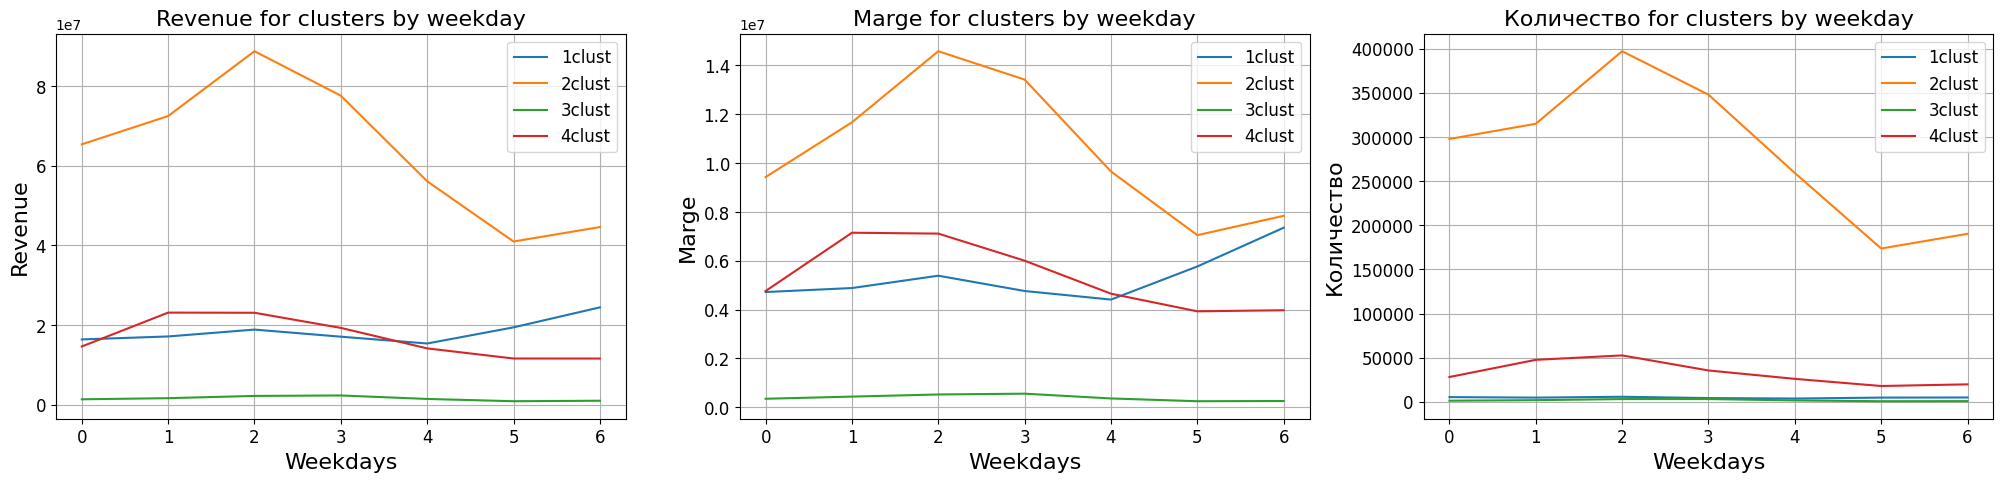

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
for name in range(len(df0_by_weekday.columns)):
  plt.subplot(1,3,1+name)
  for i in range(0, 4):
    plt.plot(clust_weekdays[i].index, clust_weekdays[i][df0_by_weekday.columns[name]], label=str(i+1) + "clust")
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel('Weekdays', size=16)
  plt.ylabel(df0_by_weekday.columns[name], size=16)
  plt.title(df0_by_weekday.columns[name]+" for clusters by weekday", size=16)
  plt.grid(b=1)
  plt.legend(fontsize=12)
plt.show()

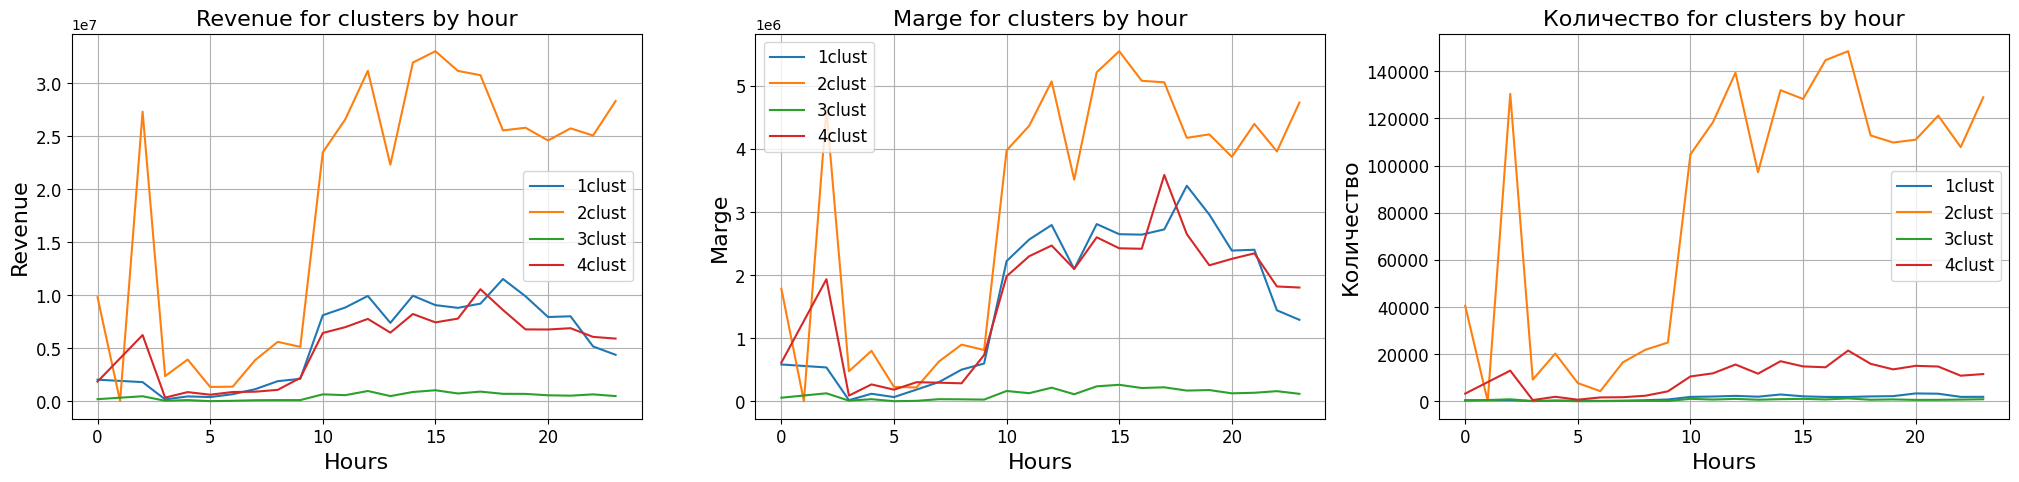

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
for name in range(len(df0_by_hours.columns)):
  plt.subplot(1,3,1+name)
  for i in range(0, 4):
    plt.plot(clust_hours[i].index, clust_hours[i][df0_by_hours.columns[name]], label=str(i+1) + "clust")
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel('Hours', size=16)
  plt.ylabel(df0_by_hours.columns[name], size=16)
  plt.title(df0_by_hours.columns[name]+" for clusters by hour", size=16)
  plt.grid(b=1)
  plt.legend(fontsize=12)
plt.show()